In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
from PIL import Image

C:\Users\user\AppData\Local\Temp\ipykernel_9656\4229558788.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
excel_file="data.xlsx"

In [8]:
data = pd.read_excel(excel_file, sheet_name=None, skiprows=1)
lemon_data = data["Lemon"]

In [9]:
lemon_data.columns

Index(['Date', 'Sample name', 'File name', 'Initial (gram)', 'Waste (gram)',
       '% Waste', 'Unnamed: 6', 'Date.1', 'Sample name.1', 'File name.1',
       'Initial (gram).1', 'Waste (gram).1', '% Waste.1'],
      dtype='object')

In [10]:
lemon_data_top = lemon_data[["File name", "% Waste"]]
lemon_data_top.dropna(inplace=True)

lemon_data_side = lemon_data[["File name.1", "% Waste.1"]]

lemon_data_side.rename(columns={"File name.1": "File name", "% Waste.1": "% Waste"},inplace=True)
lemon_data_side.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9656\4094097339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peach_data_top.dropna(inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9656\4094097339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peach_data_side.rename(columns={"File name.1": "File name", "% Waste.1": "% Waste"},inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9656\4094097339.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [11]:
lemon_data_top

,File name,% Waste
0,20240104_lemon_01_top_01,30.931677
1,20240104_lemon_02_top_01,31.090487
2,20240104_lemon_03_top_01,36.273818
3,20240104_lemon_04_top_01,100.000000
4,20240104_lemon_05_top_01,7.618284
5,20240104_lemon_06_top_01,17.797138
6,20240104_lemon_07_top_01,3.662692
7,20240104_lemon_08_top_01,4.500549
8,20240104_lemon_09_top_01,2.262931
9,20240104_lemon_10_top_01,27.886563


In [12]:
lemon_data_side

,File name,% Waste
0,20240104_lemon_01_side_01,30.931677
1,20240104_lemon_02_side_01,31.090487
2,20240104_lemon_03_side_01,36.273818
3,20240104_lemon_04_side_01,100.000000
4,20240104_lemon_05_side_01,7.618284
5,20240104_lemon_06_side_01,17.797138
6,20240104_lemon_07_side_01,3.662692
7,20240104_lemon_08_side_01,4.500549
8,20240104_lemon_09_side_01,2.262931
9,20240104_lemon_10_side_01,27.886563


In [13]:
data = pd.concat([lemon_data_side,lemon_data_top], axis=0)

In [14]:
data

,File name,% Waste
0,20240104_lemon_01_side_01,30.931677
1,20240104_lemon_02_side_01,31.090487
2,20240104_lemon_03_side_01,36.273818
3,20240104_lemon_04_side_01,100.000000
4,20240104_lemon_05_side_01,7.618284
...,...,...
27,20240110_lemon_10_top_01,6.425703
28,20240110_lemon_11_top_01,32.337434
29,20240110_lemon_12_top_01,58.393574
30,20240110_lemon_13_top_01,32.858215


<Axes: >

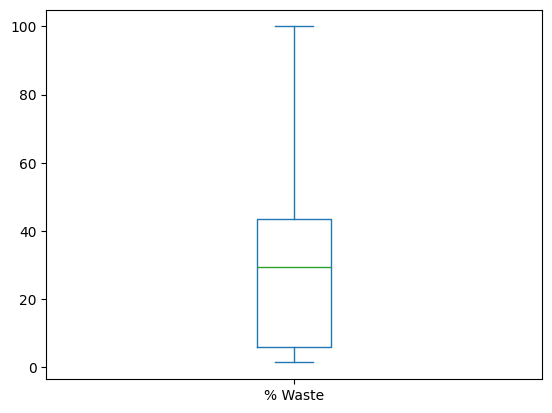

In [15]:
data.plot.box()

In [16]:
actual_waste = data["% Waste"]
baseline_prediction = np.mean(data["% Waste"]) 

# Generate baseline predictions for all samples
baseline_predictions = np.full_like(actual_waste, baseline_prediction)

# Calculate RMSE for baseline predictions
baseline_rmse = np.sqrt(mean_squared_error(actual_waste, baseline_predictions))



print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 31.22215559754454


Extraction Color Histograms and Training Models

In [18]:
# Function to extract histogram features from image files
def extract_histogram(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            raise Exception(f"Failed to open image '{image_path}'")
        hist = cv2.calcHist(
            [image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]
        )
        hist = cv2.normalize(hist, hist).flatten()
        return hist
    except Exception as e:
        print(f"Error processing image '{image_path}': {e}")
        return None


# Extracting histogram features from filenames
lemon_folder = "cropped_lemon"
data["Histogram"] = data["File name"].apply(
    lambda x: extract_histogram(os.path.join(lemon_folder, x + ".jpg"))
)

# Remove rows where the histogram extraction failed
data = data.dropna()

# Preparing features and target
X = np.vstack(data["Histogram"]).astype(float)
y = data["% Waste"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training regression models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}: RMSE = {rmse}")

Random Forest: RMSE = 13.36459770987307
XGBoost: RMSE = 29.014725469207534
SVR: RMSE = 40.014418370265766


C:\Users\user\AppData\Local\Temp\ipykernel_9656\3655588307.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Histogram"] = data["File name"].apply(


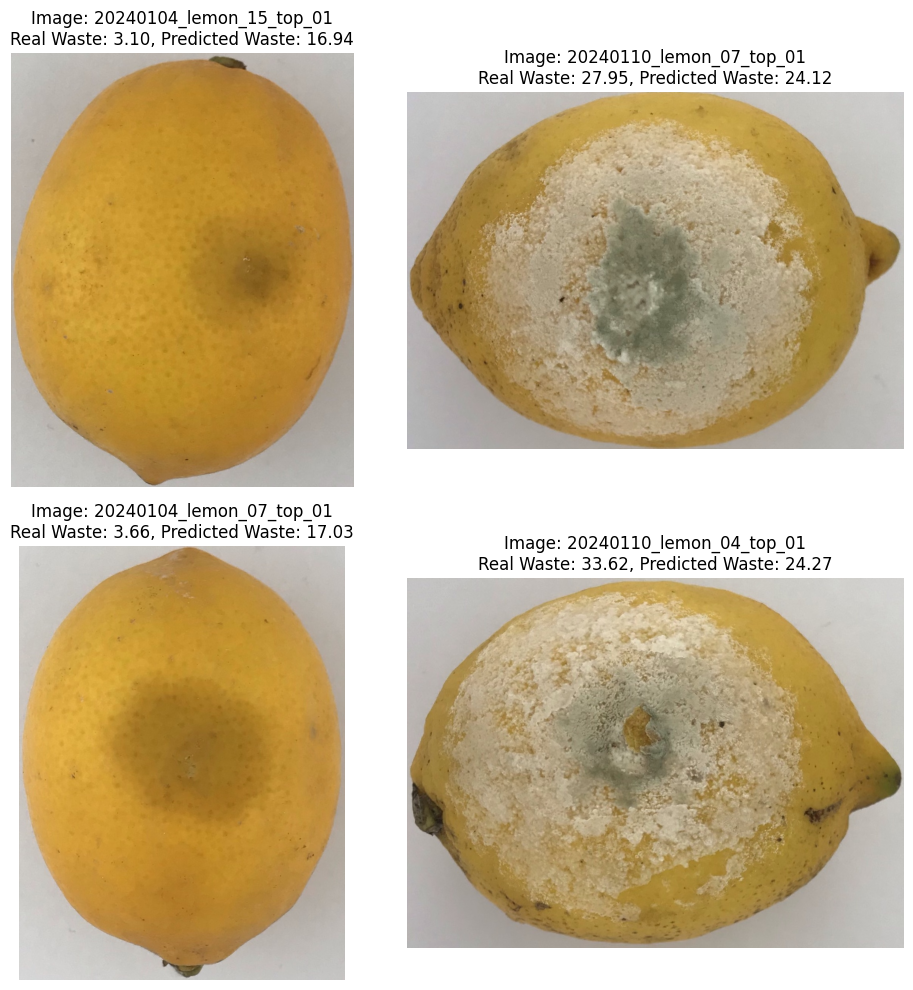

In [19]:

test_filenames = random.sample(
    data["File name"].tolist(), 4
)  # Select 4 images for a 2x2 grid
test_image_paths = [
    os.path.join(lemon_folder, f"{filename}.jpg") for filename in test_filenames
]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display real and predicted waste percentages for test images
for ax, image_path, filename in zip(axes.flatten(), test_image_paths, test_filenames):
    real_waste_percentage = data[data["File name"] == filename]["% Waste"].values[0]
    hist = extract_histogram(image_path)
    if hist is not None:
        hist = hist.reshape(1, -1)
        predicted_waste = model.predict(hist)[0]

        # Load and display the image using Matplotlib
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.set_title(
            f"Image: {filename}\nReal Waste: {real_waste_percentage:.2f}, Predicted Waste: {predicted_waste:.2f}"
        )
        ax.axis("off")  # Hide axes
    else:
        print(f"Image: {image_path}, Histogram extraction failed")

# Adjust layout
plt.tight_layout()
plt.show()

## DL Based Regression

In [21]:
train_df, test_df = train_test_split(data.dropna(), test_size=0.2, random_state=42)

train_df = train_df[
    train_df["File name"].apply(
        lambda x: os.path.exists(os.path.join("cropped_lemon", x + ".jpg"))
    )
]
test_df = test_df[
    test_df["File name"].apply(
        lambda x: os.path.exists(os.path.join("cropped_lemon", x + ".jpg"))
    )
]


val_df, test_df = train_test_split(test_df,test_size=0.5, random_state=42)

len(train_df),len(test_df), len(val_df)

(35, 5, 4)

In [22]:
train_df

,File name,% Waste,Histogram
3,20240104_lemon_04_side_01,100.000000,"[0.0, 4.374764e-06, 4.374764e-06, 0.0, 0.0, 0...."
6,20240104_lemon_07_side_01,3.662692,"[0.0, 2.6107715e-05, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10,20240104_lemon_11_top_01,3.468208,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14,20240104_lemon_15_top_01,3.104027,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,20240104_lemon_03_top_01,36.273818,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
17,20240104_lemon_18_side_01,100.000000,"[0.0, 1.5243794e-05, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13,20240104_lemon_14_side_01,14.205128,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
24,20240110_lemon_07_top_01,27.949367,"[3.3521626e-06, 8.3804065e-05, 0.0, 0.0, 0.0, ..."
15,20240104_lemon_16_side_01,3.706897,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,20240104_lemon_10_side_01,27.886563,"[0.00046543643, 0.0011600108, 0.0, 0.0, 0.0, 0..."


In [24]:
from torchvision import transforms


class CustomDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.dataframe.iloc[idx, 0] + ".jpg")
        if not os.path.exists(img_name):
            return None, None
        image = cv2.imread(img_name)
        label = self.dataframe.iloc[idx, 1]

        # Convert BGR image to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Convert numpy array to PIL image
        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)

        return image, label


# Define image transformations
train_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

test_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)


# Define datasets and data loaders
train_dataset = CustomDataset(train_df, "cropped_lemon", transform=train_transforms)
test_dataset = CustomDataset(test_df, "cropped_lemon", transform=test_transforms)
val_dataset = CustomDataset(val_df, "cropped_lemon", transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


# Define the model
class RegressionModel(nn.Module):

    def __init__(self):

        super(RegressionModel, self).__init__()
        resnet = torchvision.models.resnet34(pretrained=True)
        self.features = nn.Sequential(
            *list(resnet.children())[:-1]
        )  # Remove the last fully connected layer
        self.regressor = nn.Linear(
            512, 1
        )  # Replace the last layer with a regression layer

    def forward(self, x):

        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.regressor(x)
        return x


# Define the model
model = RegressionModel()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

# Learning rate scheduler
scheduler = ReduceLROnPlateau(
    optimizer, mode="min", factor=0.2, patience=3, verbose=True
)

# Early stopping
best_val_loss = float("inf")
patience = 10
counter = 0
best_model_weights = None

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in tqdm(
        train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False
    ):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}")

    # Validation loop
    model.eval()
    val_running_loss = 0.0

    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        val_loss = criterion(outputs.squeeze(), labels.float())
        val_running_loss += val_loss.item() * inputs.size(0)

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_epoch_loss:.4f}")

    # Learning rate scheduler step
    scheduler.step(val_epoch_loss)

    # Early stopping
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        counter = 0
        # Save the best model weights
        best_model_weights = model.state_dict()

    else:
        counter += 1
        if counter >= patience:
            print("Early stopping...")
            break

# Load the best model weights
if best_model_weights is not None:
    model.load_state_dict(best_model_weights)

torch.save(model.state_dict(), "lemon_regression_model.pth")
# Evaluation
model.eval()
predictions = []
true_labels = []
with torch.no_grad():

    for inputs, labels in tqdm(test_loader, desc="Testing", leave=False):

        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        predictions.extend(outputs.squeeze().tolist())

        true_labels.extend(labels.tolist())

mse = mean_squared_error(true_labels, predictions)
print(f"Root Mean Squared Error on Test Set: {np.sqrt(mse):.4f}")

Epoch [1/100], Training Loss: 2051.5670
Epoch [1/100], Validation Loss: 3701.8916


Epoch [2/100], Training Loss: 1874.5543
Epoch [2/100], Validation Loss: 3477.3726


Epoch [3/100], Training Loss: 1703.8483
Epoch [3/100], Validation Loss: 3055.5288


Epoch [4/100], Training Loss: 1580.0536
Epoch [4/100], Validation Loss: 2346.3818


Epoch [5/100], Training Loss: 1505.3414
Epoch [5/100], Validation Loss: 981.7117


Epoch [6/100], Training Loss: 1387.4047
Epoch [6/100], Validation Loss: 800.1701


Epoch [7/100], Training Loss: 1348.8462
Epoch [7/100], Validation Loss: 753.1753


Epoch [8/100], Training Loss: 1250.7613
Epoch [8/100], Validation Loss: 691.5095


Epoch [9/100], Training Loss: 1250.8474
Epoch [9/100], Validation Loss: 1049.2844


Epoch [10/100], Training Loss: 1187.7791
Epoch [10/100], Validation Loss: 881.5013


Epoch [11/100], Training Loss: 1108.5368
Epoch [11/100], Validation Loss: 676.9775


Epoch [12/100], Training Loss: 1069.9869
Epoch [12/100], Validation Loss: 506.0620


Epoch [13/100], Training Loss: 1035.5011
Epoch [13/100], Validation Loss: 1037.5087


Epoch [14/100], Training Loss: 1000.6353
Epoch [14/100], Validation Loss: 902.6581


Epoch [15/100], Training Loss: 959.8789
Epoch [15/100], Validation Loss: 1126.4446


Epoch [16/100], Training Loss: 910.3439
Epoch [16/100], Validation Loss: 1138.4918


Epoch [17/100], Training Loss: 1094.3060
Epoch [17/100], Validation Loss: 1010.2526


Epoch [18/100], Training Loss: 927.6190
Epoch [18/100], Validation Loss: 899.4668


Epoch [19/100], Training Loss: 871.2429
Epoch [19/100], Validation Loss: 975.3952


Epoch [20/100], Training Loss: 881.9067
Epoch [20/100], Validation Loss: 1272.2736


Epoch [21/100], Training Loss: 959.1971
Epoch [21/100], Validation Loss: 1314.5872


Epoch [22/100], Training Loss: 840.0844
Epoch [22/100], Validation Loss: 1217.3643
Early stopping...


Root Mean Squared Error on Test Set: 33.1858


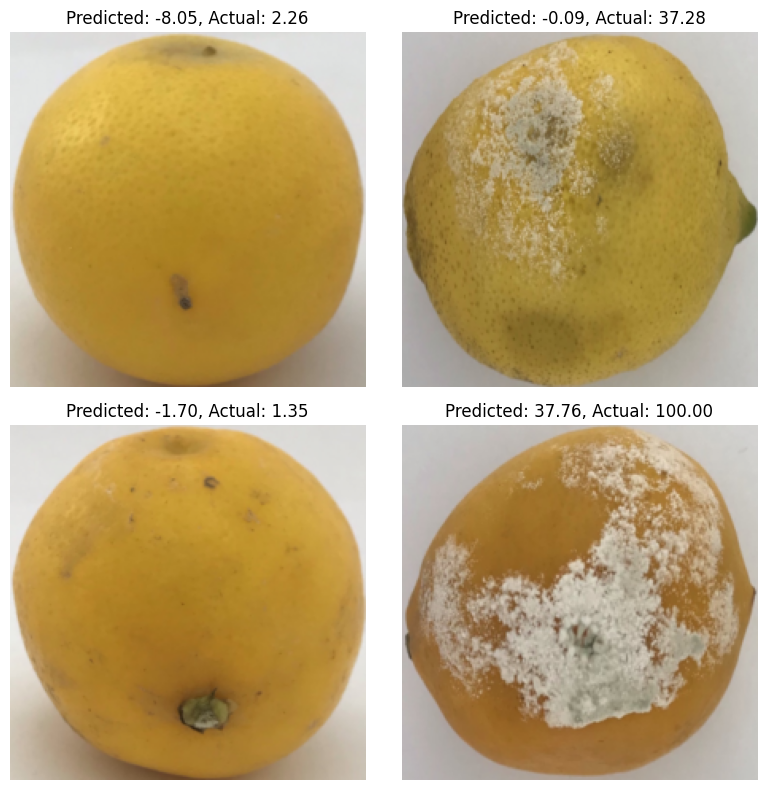

In [25]:
# Evaluation
model.eval()
with torch.no_grad():
    # Get random indices for 4 test images
    indices = np.random.choice(len(test_dataset), size=4, replace=False)

    # Create a subplot
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

    for i, idx in enumerate(indices):
        inputs, label = test_dataset[idx]
        inputs = inputs.unsqueeze(0).to(device)
        output = model(inputs)
        prediction = output.item()

        # Denormalize the image
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = inputs.squeeze().permute(1, 2, 0).cpu().numpy()
        img = std * img + mean  # Denormalize
        img = np.clip(img, 0, 1)  # Clip values to [0, 1]

        # Display the image
        axs[i // 2, i % 2].imshow(img)
        axs[i // 2, i % 2].set_title(
            f"Predicted: {prediction:.2f}, Actual: {label:.2f}"
        )
        axs[i // 2, i % 2].axis("off")

    plt.tight_layout()
    plt.show()